In [1]:
import torch
from matplotlib import pyplot as plt
from torchvision.utils import draw_bounding_boxes
from utils.util import scale_boxes, normalize_tensor
from data.datasets import get_dataset
from utils.depth import get_depth_layout

dataset = get_dataset('clevr', None, 'val', return_depth=True)

tensor([ 0.4348,  1.0000,  0.0314,  0.0000,  0.8561, -0.5000, -0.5000, -0.5000,
        -0.5000, -0.5000])

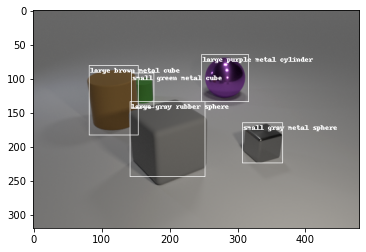

In [2]:
scene_idx = 0

image, labels, bboxes, depths = dataset[scene_idx]

scaled_bboxes = scale_boxes(bboxes, image.shape[-2:], 'coordinates', torch.int)

disp = normalize_tensor(image, (0,255)).type(torch.uint8)

texts = [dataset.idx2label[idx] for idx in labels]

disp = draw_bounding_boxes(disp, scaled_bboxes, texts)

plt.imshow(disp.permute(1,2,0))

depths

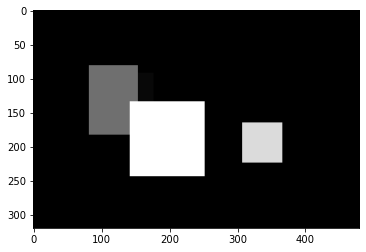

In [3]:
depth_layout = get_depth_layout(depths, image.shape[-2:], bboxes)
plt.imshow(depth_layout, cmap='gray')